In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=7fc98b8a6b980fc22f9796477385e053af67931744f55fe447cd819a8879ee2e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import expr
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
sns.set(style="darkgrid")
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr

In [ ]:
from pyspark.sql import SparkSession

# Inisialisasi SparkSession
spark = SparkSession.builder \
    .appName("Read CSV and Display Data") \
    .getOrCreate()

# Membaca file CSV menjadi DataFrame
df = spark.read.csv("/content/gdrive/MyDrive/bigdata/heart.csv", header=True, inferSchema=True)

# Menampilkan beberapa baris pertama dari DataFrame
df.show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
| 58|  0|  0|     100| 248|  0|      0|    122|    0|    1.0|    1|  0|   2|     1|
| 58|  1|  0|     114| 318|  0|      2|    140|    0|    4.4|    0|  3|   1|     0|
| 55|  1|  0|     160| 289|  0|      0|    145|    1|    0.8|    1|  1|   3|     0|
| 46|  1|  0|     120| 249|  0|      0|    144|    0|    0.8|    2|  0|   3|

+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|              age|               sex|                cp|          trestbps|             chol|                fbs|           restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|       new_column|
+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|             1025|              1025|              1025|              1025|             1025|               1

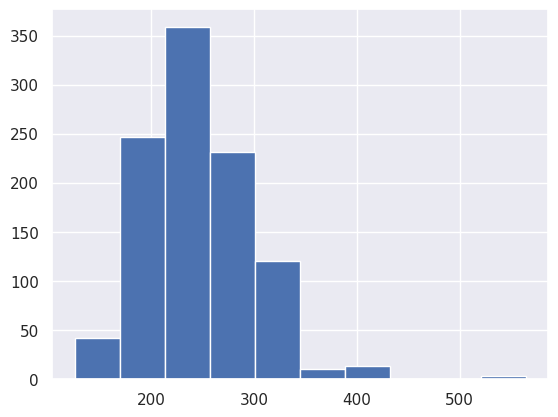

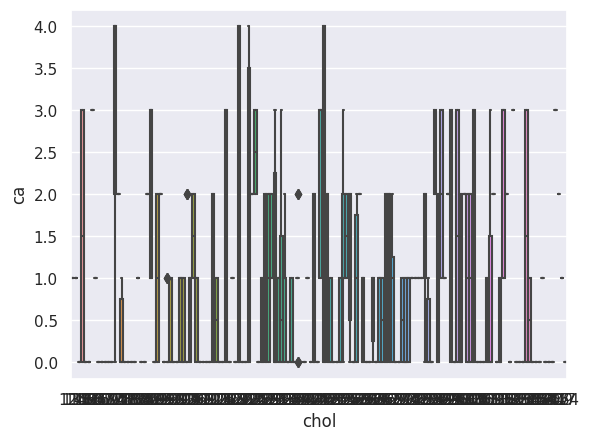

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder \
    .appName("Nama Aplikasi Anda") \
    .getOrCreate()

# Membaca data menggunakan Spark
df = spark.read.csv("/content/gdrive/MyDrive/bigdata/heart.csv", header=True, inferSchema=True)

# Melakukan operasi pada data menggunakan PySpark
df = df.withColumn("new_column", expr("chol + ca"))

# Menampilkan statistik ringkasan data
df.describe().show()

# Melakukan visualisasi data menggunakan matplotlib
plt.hist(df.select("chol").rdd.flatMap(lambda x: x).collect(), bins=10)
plt.show()

# Melakukan visualisasi data menggunakan seaborn
sns.boxplot(x='chol', y='ca', data=pandas_df)
plt.show()


# Melakukan visualisasi data menggunakan plotly express
fig = px.scatter(pandas_df, x='chol', y='ca', color='target')
fig.show()

# Menutup SparkSession
spark.stop()
